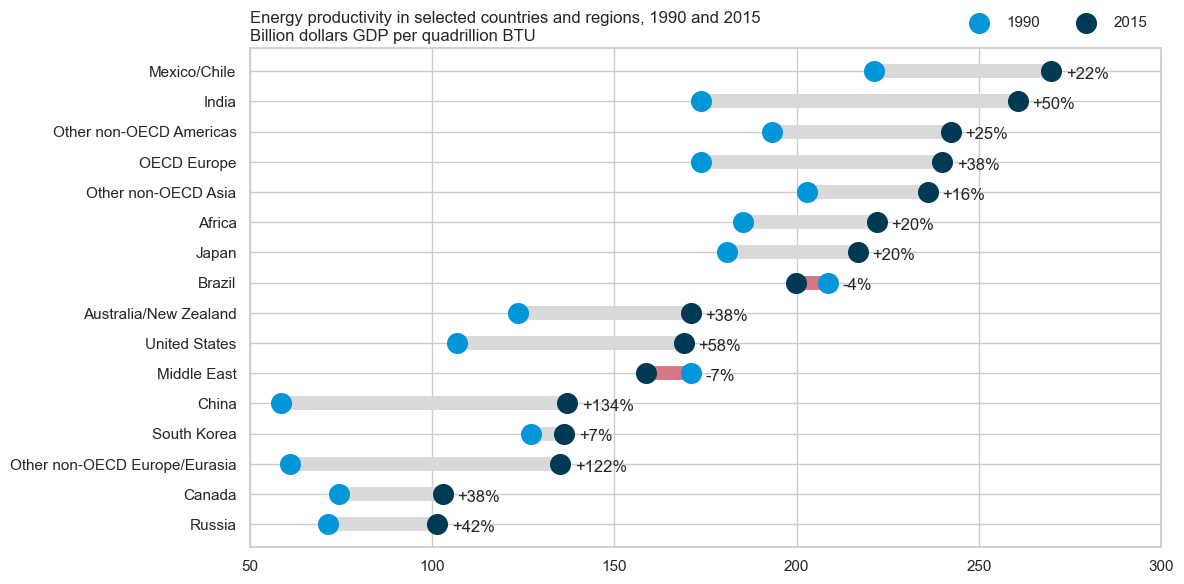

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set_theme(style="whitegrid")  # set style

data = io.StringIO(""""Country"  1990  2015
"Russia" 71.5 101.4
"Canada" 74.4 102.9
"Other non-OECD Europe/Eurasia" 60.9 135.2
"South Korea" 127.0 136.2
"China" 58.5 137.1
"Middle East" 170.9 158.8
"United States" 106.8 169.0
"Australia/New Zealand" 123.6 170.9
"Brazil" 208.5 199.8
"Japan" 181.0 216.7
"Africa" 185.4 222.0
"Other non-OECD Asia" 202.7 236.0
"OECD Europe" 173.8 239.9
"Other non-OECD Americas" 193.1 242.3
"India" 173.8 260.6
"Mexico/Chile" 221.1 269.8""")

df = pd.read_csv(data, sep="\s+", quotechar='"')
df = df.set_index("Country").sort_values("2015")
df["change"] = df["2015"] / df["1990"] - 1


plt.figure(figsize=(12,6))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['2015'] > df['1990'], '#d9d9d9', '#d57883')
plt.hlines(y=y_range, xmin=df['1990'], xmax=df['2015'],
           color=colors, lw=10)
plt.scatter(df['1990'], y_range, color='#0096d7', s=200, label='1990', zorder=3)
plt.scatter(df['2015'], y_range, color='#003953', s=200 , label='2015', zorder=3)
for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["1990"], row["2015"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df.index)
plt.title("Energy productivity in selected countries and regions, 1990 and 2015\nBillion dollars GDP per quadrillion BTU", loc='left')
plt.xlim(50, 300)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()